In [1]:
import pandas as pd
import seaborn as sns

In [2]:
print((pd.__verson__), (sns.__version__))

AttributeError: module 'pandas' has no attribute '__verson__'

In [3]:
print(pd.__version__)
print(sns.__version__)

1.4.4
0.12.0


In [5]:
#df=>pandas->data frame
df=sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model_year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

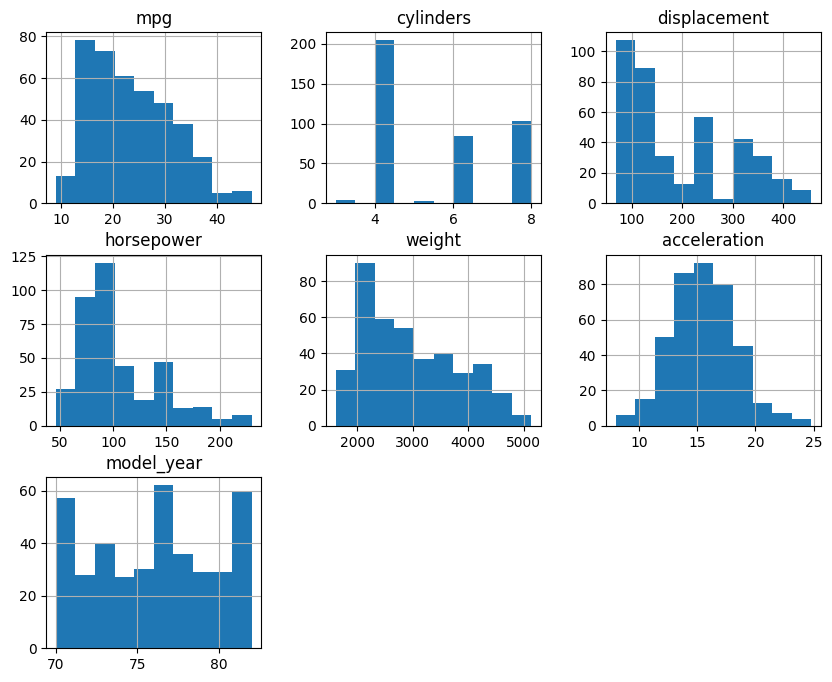

In [8]:
#히스토그램 - 표로 되어있는 도수 분표
df.hist(figsize=(10,8))

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model_year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

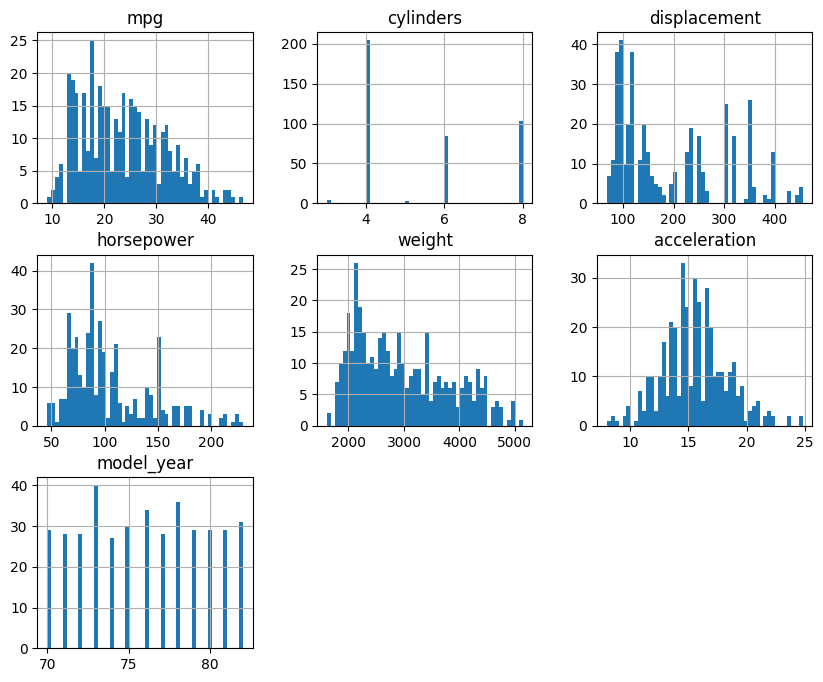

In [10]:
#figsize-도표사이즈 bins-도표 수치세분화
df.hist(figsize=(10,8),bins=50)

In [11]:
# 비대칭도(왜도)
# 왜도가 음수일경우에는 오른쪽으로 기운다.
# 왜도가 양수일경우 왼쪽으로 기운다.
# 평균과 중앙값이 같으면 0
# skew() - 왜도 구하기
df.skew()

C:\Users\KB\AppData\Local\Temp\ipykernel_10256\124694819.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model_year      0.011535
dtype: float64

In [12]:
#첨도 - 확률분보도의 도표가 뾰족한 정도를 나타내는 척도
# 데이터가 어느 곳에 집중적으로 올려 있는가를 판단할때 사용
# 첨도값이 3에 가까울 수록 정규 분포에 가깝다.
# 첨도 값(K)<3일 경우 더 뾰족한 분포(꼬리가 길다)
# K>3 경우 더 완만한분포(꼬리가 두꺼운 분포)
# kurt()
df.kurt()

C:\Users\KB\AppData\Local\Temp\ipykernel_10256\2502102354.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.696947
weight         -0.785529
acceleration    0.419497
model_year     -1.181232
dtype: float64

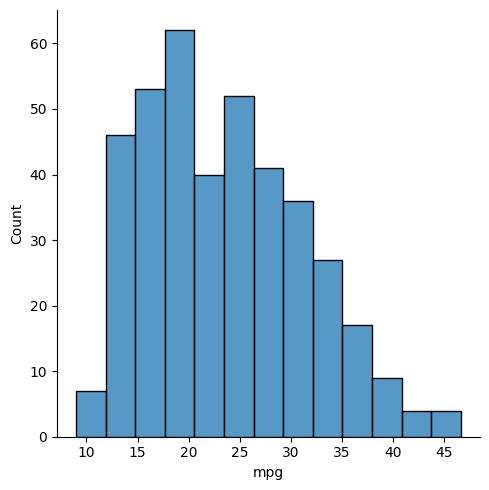

In [16]:
# seaborn ->히스토그램->displot()
sns.displot(data=df, x="mpg")

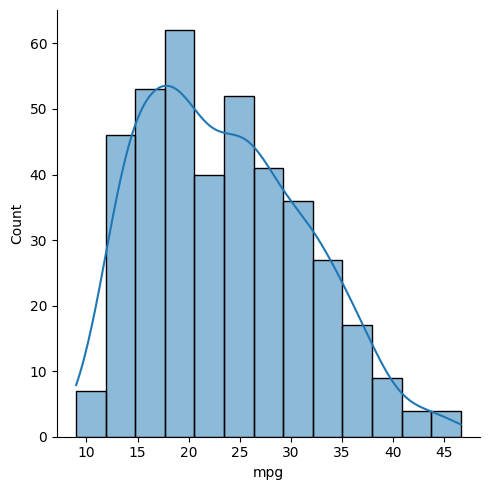

In [17]:
#kde- 선그리기
sns.displot(data=df, x="mpg",kde="True")

C:\Users\KB\AppData\Local\Temp\ipykernel_10256\3852404286.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x="mpg", shade="True")


<AxesSubplot:xlabel='mpg', ylabel='Density'>

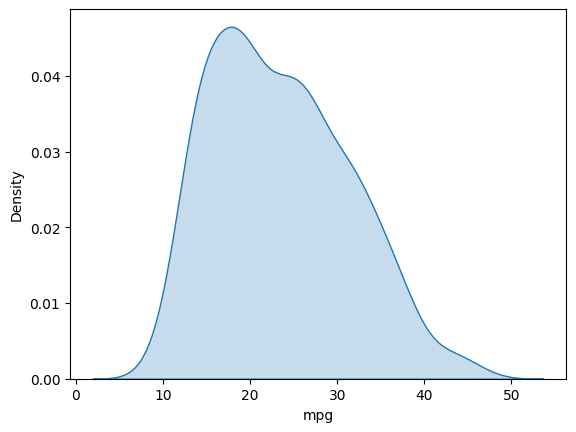

In [19]:
#kdeplot() - 선형 그래프트, shade-범위 색넣기
sns.kdeplot(data=df,x="mpg", shade="True")

In [22]:
#mpg값에 대해 skew, kurt  값을 구하기
#하나의 칼럼 객체 -> 시리즈(serise)
df["mpg"].agg(["skew" ,"kurt"])

skew    0.457066
kurt   -0.510781
Name: mpg, dtype: float64

<AxesSubplot:xlabel='mpg'>

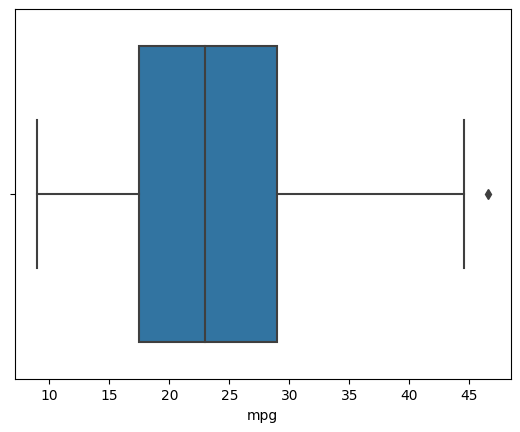

In [23]:
#boxplot으로 mpg의 사분위 수 시각화
sns.boxplot(data=df,x="mpg")

In [24]:
#0~25%, 25%~50%, 50%~75%, 75%~100% 로 나누고 다이아몬드모양(◆)이 있으면 100% or 0% 밖의 값이 존재한다

In [26]:
#mpg 기술 통계 구학'
df["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

<AxesSubplot:xlabel='mpg'>

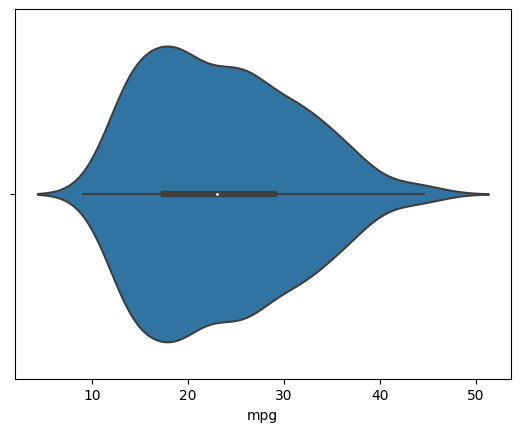

In [28]:
#violinplot  그리기
sns.violinplot(data=df,x="mpg")

<AxesSubplot:>

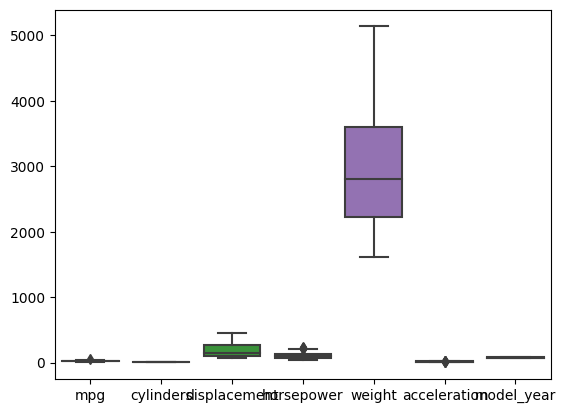

In [29]:
sns.boxplot(data=df)

<AxesSubplot:>

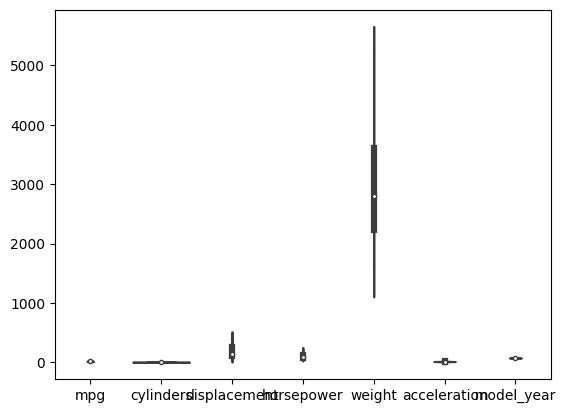

In [30]:
sns.violinplot(data=df)

In [31]:
df.head

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  

In [32]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu


<AxesSubplot:xlabel='weight'>

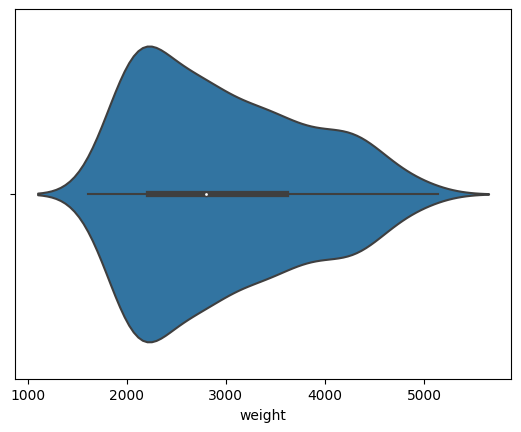

In [33]:
sns.violinplot(data=df,x="weight")

<AxesSubplot:xlabel='weight', ylabel='mpg'>

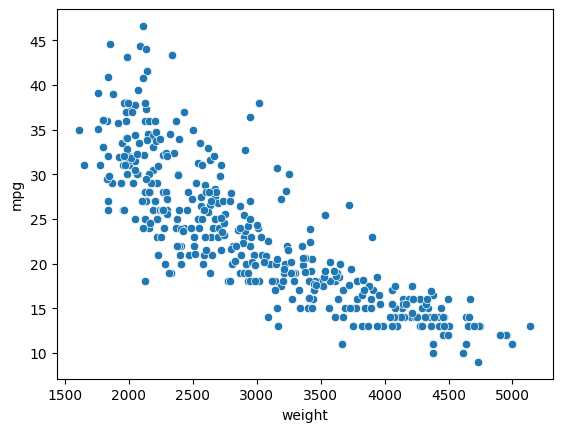

In [34]:
#scatterplot 2개의 수치 비교하기
sns.scatterplot(data=df,x="weight", y="mpg")

<AxesSubplot:xlabel='weight', ylabel='mpg'>

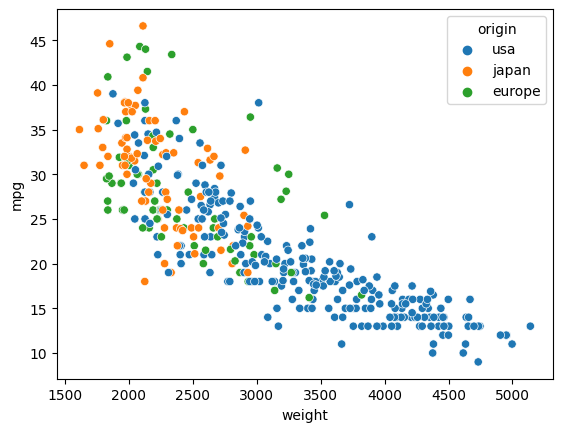

In [35]:
#hue 범례 - 구별점 1개 더 추가
sns.scatterplot(data=df,x="weight", y="mpg",hue="origin")

<AxesSubplot:xlabel='weight', ylabel='mpg'>

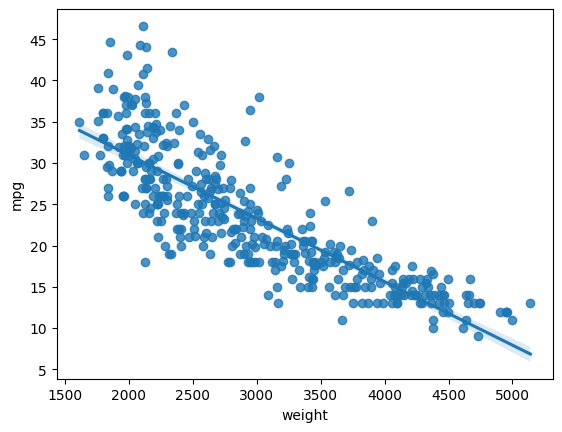

In [39]:
#regplot으로 회귀선 그리기
sns.regplot(data=df,x="weight",y="mpg")

<AxesSubplot:xlabel='weight', ylabel='mpg'>

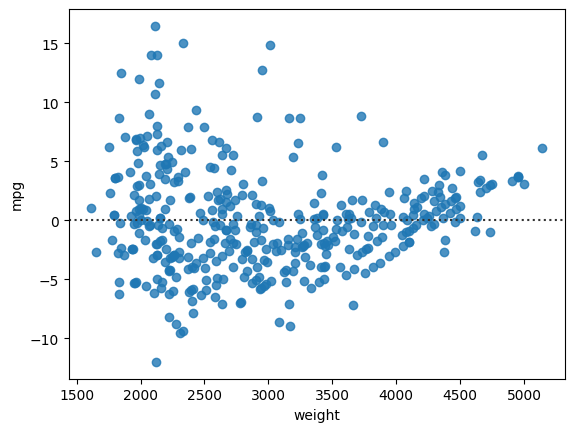

In [42]:
#회귀선의 잔차를 시각화 하기
sns.residplot(data=df,x="weight",y="mpg")

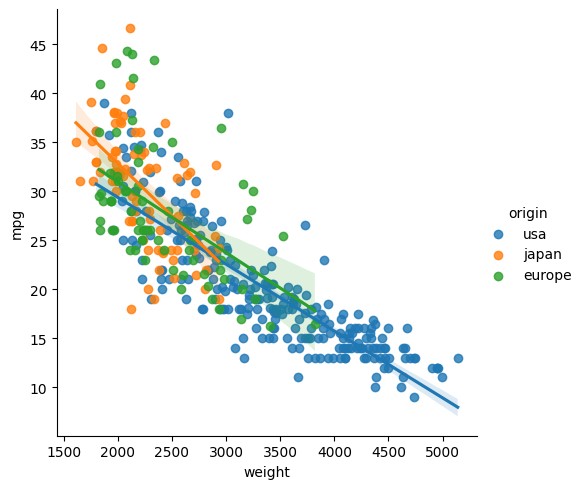

In [43]:
sns.lmplot(data=df,x="weight",y="mpg",hue="origin")

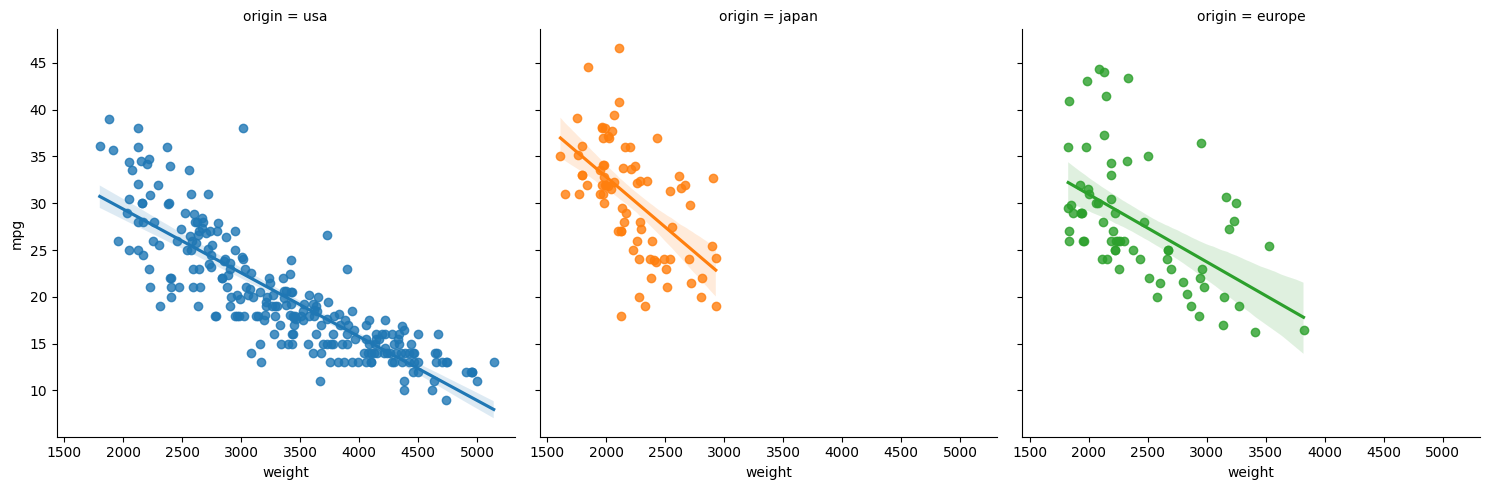

In [44]:
sns.lmplot(data=df,x="weight",y="mpg",hue="origin",col="origin")

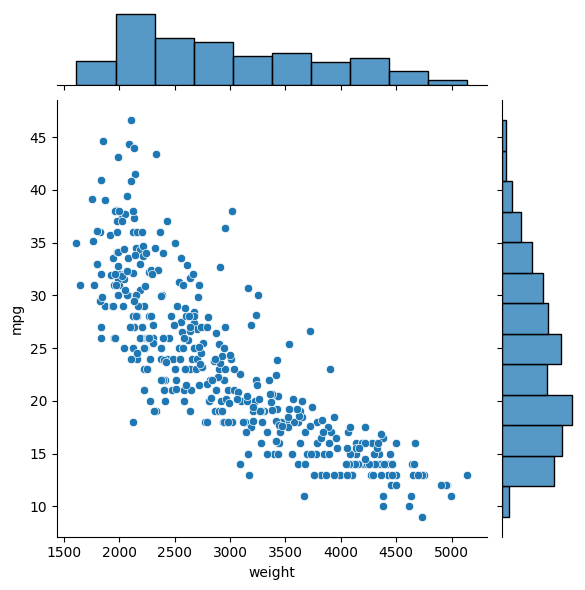

In [45]:
sns.jointplot(data=df,x="weight",y="mpg")

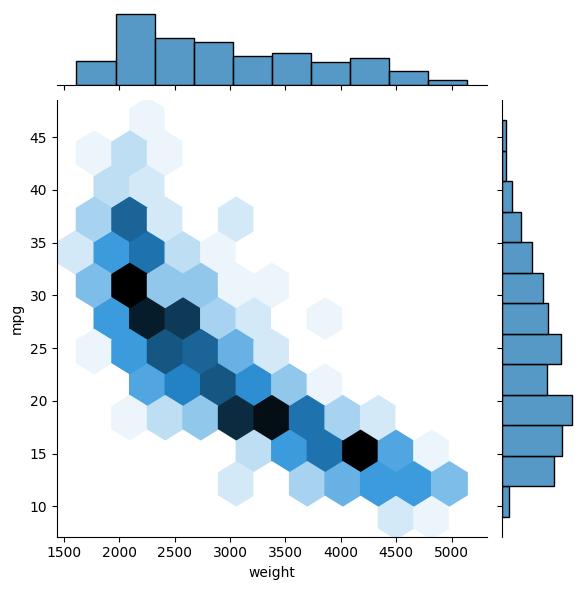

In [46]:
sns.jointplot(data=df,x="weight",y="mpg",kind="hex")